# Descriptive Analysis Of Data
Here I just want to have a comprehensive check of my data.

1. format of data
2. nans/infs?
3. range of data
4. shapes of data (features, samples)
5. labels of data?
6. missing data? (not relevant for paremap probably)

Input subject, and session

In [2]:
# Import Necessary Libraries
import numpy as np
import scipy.io

import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable


from sklearn.decomposition import PCA
import scipy.stats as stats
from scipy.spatial import distance as Distance

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

%matplotlib inline

# 1. Format Of Data

In [3]:
#### Extract wordpairs data into a dictionary for a subject/session/block
#### dictionary{wordpair:{channels}}
def extractSubjSessionBlockData(subj, session, block):
    # file directory for a subj/session/block
    filedir = '../../condensed_data_' + subj + '/blocks/' + session + '/' + block
    wordpairs = os.listdir(filedir) 
    
    # initialize data dictionary with meta data
    data_dict = {}
    data_dict['meta'] = {'subject': subj,
                         'session': session,
                         'block': block}
    
    for wordpair in wordpairs:    # loop thru all wordpairs
        wordpair_dir = filedir + '/' + wordpair
        all_channel_mats = os.listdir(wordpair_dir)
        
        data_dict[wordpair] = {}
        for channel in all_channel_mats: # loop thru all channels
            chan_file = wordpair_dir + '/' + channel

            ## 00: load in data
            data = scipy.io.loadmat(chan_file)
            data = data['data']
            
            ## 01: get the time point for probeword on
            timeZero = data['timeZero'][0][0][0]
        
            ## 02: get the time point of vocalization
            vocalization = data['vocalization'][0][0][0]
        
            ## 03: Get Power Matrix
            power_matrix = data['powerMatZ'][0][0]

            chan = channel.split('_')[0]
            
            # convert channel data into a json dict
            data_dict[wordpair][chan] = {'timeZero': timeZero,
                                          'timeVocalization':vocalization,
                                          'powerMat': power_matrix}
    return data_dict


In [4]:
######## Get list of files (.mat) we want to work with ########
subj = 'NIH034' # change the directories if you want
filedir = '../../condensed_data_' + subj + '/blocks/'
sessions = os.listdir(filedir)
sessions = sessions[2:] # change which sessions we want
print "Analyzing subject: ", subj
print "The sessions: ", sessions

# loop through each session
for idx, session in enumerate(sessions):
    # the session directory
    sessiondir = filedir + sessions[idx]
    
    # get all blocks for this session
    blocks = os.listdir(sessiondir)
    print "The blocks are: \n", blocks, ' \n'
    
    if len(blocks) != 6: # error check on the directories
        print blocks
        print("Error in the # of blocks. There should be 5.")
        break
    
    # loop through each block one at a time, analyze
    for i in range(0, 1):
        block = blocks[i]
        block_dir = sessiondir + '/' + block
        
        # in each block, get list of word pairs from first and second block
        wordpairs = os.listdir(block_dir)
        print "The word pairs for this session/block: \n", wordpairs
        a_wordpair = wordpairs[0]
        
        print 'Subject: ', subj
        print 'Session: ', session
        print 'Block: ', block
        
        block_data = extractSubjSessionBlockData(subj, session, block)
        print block_data.keys()
        
        print block_data['meta'], '\n\n'
        print "The type of data input for power matrix is: ", type(block_data['BRICK_CLOCK']['1']['powerMat'])
        print "The shape of each power matrix is (approximately): ", block_data['BRICK_CLOCK']['1']['powerMat'].shape
        print "The range of data goes from: ", np.amin(block_data['BRICK_CLOCK']['1']['powerMat']), " to ", np.amax(block_data['BRICK_CLOCK']['1']['powerMat'])

        
        break

    break

Analyzing subject:  NIH034
The sessions:  ['session_1', 'session_2']
The blocks are: 
['BLOCK_0', 'BLOCK_1', 'BLOCK_2', 'BLOCK_3', 'BLOCK_4', 'BLOCK_5']  

The word pairs for this session/block: 
['BRICK_CLOCK', 'CLOCK_BRICK', 'GLASS_JUICE', 'JUICE_GLASS']
Subject:  NIH034
Session:  session_1
Block:  BLOCK_0
['BRICK_CLOCK', 'GLASS_JUICE', 'meta', 'JUICE_GLASS', 'CLOCK_BRICK']
{'session': 'session_1', 'block': 'BLOCK_0', 'subject': 'NIH034'} 


The type of data input for power matrix is:  <type 'numpy.ndarray'>
The shape of each power matrix is (approximately):  (20, 7, 149)
The range of data goes from:  -2.82848697831  to  2.29858514626


## 2. NIH039

In [5]:
def extractSubjSessionBlockData(subj, session, block):
    # file directory for a subj/session/block
    filedir = '../../condensed_data_' + subj + '/sessions/' + session + '/' + block
    wordpairs = os.listdir(filedir) 
    
    # initialize data dictionary with meta data
    data_dict = {}
    data_dict['meta'] = {'subject': subj,
                         'session': session,
                         'block': block}
    data_dict['data'] = {}
    for wordpair in wordpairs:    # loop thru all wordpairs
        wordpair_dir = filedir + '/' + wordpair
        all_channel_mats = os.listdir(wordpair_dir)
        
        data_dict['data'][wordpair] = {}
        for channel in all_channel_mats: # loop thru all channels
            chan_file = wordpair_dir + '/' + channel

            ## 00: load in data
            data = scipy.io.loadmat(chan_file)
            data = data['data']
            
            ## 01: get the time point for probeword on
            timeZero = data['timeZero'][0][0][0]
        
            ## 02: get the time point of vocalization
            vocalization = data['vocalization'][0][0][0]
        
            ## 03: Get Power Matrix
            power_matrix = data['powerMatZ'][0][0]
            
            ## 04: Get absolute response times for plotting
            responseTimes = data['originalResponseTimes'][0][0][0]
            
            ## 05: Get probe word and target
            probeWord = data['probeWord'][0][0][0]
            targetWord = data['targetWord'][0][0][0]
            
            chan = channel.split('_')[0]
            
            # convert channel data into a json dict
            data_dict['data'][wordpair][chan] = {'timeZero': timeZero,
                                          'timeVocalization':vocalization,
                                          'powerMat': power_matrix,
                                          'responseTimes': responseTimes,
                                          'probeWord': probeWord,
                                          'targetWord': targetWord}
    
    data_dict['meta']['description'] = data['description'][0][0][0]

    return data_dict

In [6]:
######## Get list of files (.mat) we want to work with ########
subj = 'NIH039' # change the directories if you want
filedir = '../../condensed_data_' + subj + '/sessions/'
sessions = os.listdir(filedir)
sessions = sessions[2:] # change which sessions we want
print "Analyzing subject: ", subj
print "The sessions: ", sessions

# loop through each session
for idx, session in enumerate(sessions):
    # the session directory
    sessiondir = filedir + sessions[idx]
    
    # get all blocks for this session
    blocks = os.listdir(sessiondir)
    print "The blocks are: \n", blocks, ' \n'
    
    if len(blocks) != 6: # error check on the directories
        print blocks
        print("Error in the # of blocks. There should be 5.")
        break
    
    # loop through each block one at a time, analyze
    for i in range(0, 1):
        block = blocks[i]
        block_dir = sessiondir + '/' + block
        
        # in each block, get list of word pairs from first and second block
        wordpairs = os.listdir(block_dir)
        print "The word pairs for this session/block: \n", wordpairs
        a_wordpair = wordpairs[0]
        
        print 'Subject: ', subj
        print 'Session: ', session
        print 'Block: ', block
        
        block_data = extractSubjSessionBlockData(subj, session, block)
        print block_data.keys()
        
        print block_data['meta'], '\n\n'
        print "The type of data input for power matrix is: ", type(block_data['data']['BRICK_CLOCK']['1']['powerMat'])
        print "The shape of each power matrix is (approximately): ", block_data['data']['BRICK_CLOCK']['1']['powerMat'].shape
        print "The range of data goes from: ", np.amin(block_data['data']['BRICK_CLOCK']['1']['powerMat']), " to ", np.amax(block_data['data']['BRICK_CLOCK']['1']['powerMat'])
        print "The number of channels are: ", len(block_data['data']['BRICK_CLOCK'].keys())
        
        break

    break

Analyzing subject:  NIH039
The sessions:  ['session_3']
The blocks are: 
['BLOCK_0', 'BLOCK_1', 'BLOCK_2', 'BLOCK_3', 'BLOCK_4', 'BLOCK_5']  

The word pairs for this session/block: 
['BRICK_CLOCK', 'CLOCK_BRICK', 'GLASS_JUICE', 'JUICE_GLASS']
Subject:  NIH039
Session:  session_3
Block:  BLOCK_0
['meta', 'data']
{'session': 'session_3', 'description': u'100 ms windows, 50 ms overlap. With eeg data from -1 to 5 seconds after probeWordOn.', 'block': 'BLOCK_0', 'subject': 'NIH039'} 


The type of data input for power matrix is:  <type 'numpy.ndarray'>
The shape of each power matrix is (approximately):  (20, 7, 119)
The range of data goes from:  -2.66495306147  to  3.05841664274
The number of channels are:  72


(array([ 5.,  3.,  5.,  2.,  1.,  2.,  0.,  0.,  1.,  1.]),
 array([ 0.66188672,  0.7634679 ,  0.86504907,  0.96663025,  1.06821143,
         1.1697926 ,  1.27137378,  1.37295496,  1.47453613,  1.57611731,
         1.67769849]),
 <a list of 10 Patch objects>)

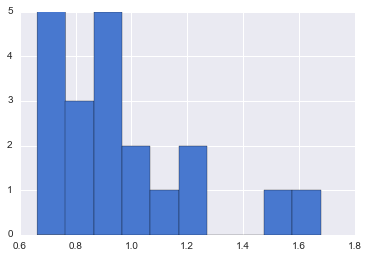

In [7]:
responseTimes =  block_data['data']['BRICK_CLOCK']['1']['responseTimes']/1000.

fig = plt.figure()
plt.hist(responseTimes)

### Check if All The Word Groups are Correct

In [8]:
def createWordGroups(wordpairs):
    # create same group pairs
    for idx, pair in enumerate(wordpairs):
        same_word_group.append([pair, pair])

    # create reverse, and different groups
    for idx, pairs in enumerate(itertools.combinations(wordpairs,2)):
        if isReverse(pairs[0], pairs[1]):
            reverse_word_group.append([pairs[0], pairs[1]])
        else:
            diff_word_group.append([pairs[0], pairs[1]])
            
    return same_word_group, reverse_word_group, diff_word_group

def isReverse(pair1, pair2):
    pair1split = pair1.split('_')
    pair2split = pair2.split('_')
    if pair1split[0] == pair2split[1] and pair1split[1] == pair2split[0]:
        return True
    else:
        return False

In [9]:
######## Get list of files (.mat) we want to work with ########
subj = 'NIH039'
filedir = '../../condensed_data_'+ subj +'/sessions/'
sessions = os.listdir(filedir)
# sessions = sessions[2:]

session_pval_dict = {}

debug_on = 1
# loop through each session
for session in sessions:
    print "Analyzing session ", session
    sessiondir = filedir + session
    
    session_pval_diff_mat = np.array(())
    session_pval_same_mat = np.array(())
    session_pval_reverse_mat = np.array(())
    
    # get all blocks for this session
    blocks = os.listdir(sessiondir)
    
    if len(blocks) != 6: # error check on the directories
        print blocks
        print("Error in the # of blocks. There should be 5.")
        break
     
    # loop through each block one at a time, analyze
    for i in range(0, 6):
        # var for block and directory
        block = blocks[i]
        block_dir = sessiondir + '/' + block
        
        # in each block, get list of word pairs from first and second block
        wordpairs = os.listdir(block_dir)
       
        # within-groups analysis only has: SAME, REVERSE, DIFFERENT
        diff_word_group = []
        reverse_word_group = []
        same_word_group = []
        
        ## 01: Create WordPair Groups
        same_word_group, reverse_word_group, diff_word_group = createWordGroups(wordpairs)
        
        # extract sessionblockdata dictionary
        block_data = extractSubjSessionBlockData(subj, session, block)
        
        chan = 1
        ################# 02a: Word Group Check #################
        for same_words in same_word_group:
            # extract data to process - average across time 
            same_word_key = same_words[0]
            probeWord = block_data['data'][same_word_key][str(chan)]['probeWord']
            targetWord = block_data['data'][same_word_key][str(chan)]['targetWord']
            
            print same_word_key, " ", probeWord, "_", targetWord
            
        break
           

Analyzing session  session_0
BRICK_CLOCK   BRICK _ CLOCK
CLOCK_BRICK   CLOCK _ BRICK
GLASS_JUICE   GLASS _ JUICE
JUICE_GLASS   JUICE _ GLASS
Analyzing session  session_1
BRICK_CLOCK   BRICK _ CLOCK
CLOCK_BRICK   CLOCK _ BRICK
GLASS_JUICE   GLASS _ JUICE
JUICE_GLASS   JUICE _ GLASS
Analyzing session  session_3
BRICK_CLOCK   BRICK _ CLOCK
CLOCK_BRICK   CLOCK _ BRICK
GLASS_JUICE   GLASS _ JUICE
JUICE_GLASS   JUICE _ GLASS
